### Name: Praveen Kumar Sahu
### Roll No: 2018IMT-070
### Course: Machine Learning Lab
### Course Code: ITIT - 4107
### Deadline : 25 September 2021

Import necessary library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import idx2numpy
from sklearn.metrics import classification_report

/home/povins/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Import the training and the testing data. Training data has 60,000 samples of handwritten digits and testing data has 10,000 sample. 
Here I used idx2numpy library to convert the idxubyte file into numpy array.

In [2]:
file_location = '/home/povins/Documents/notes/ml/assignments/dataset/mnist'
x_train = idx2numpy.convert_from_file(file_location + '/train-images-idx3-ubyte')
y_train = idx2numpy.convert_from_file(file_location + '/train-labels-idx1-ubyte')
x_test = idx2numpy.convert_from_file(file_location + '/t10k-images-idx3-ubyte')
y_test = idx2numpy.convert_from_file(file_location + '/t10k-labels-idx1-ubyte')

Ensuring import data was same as the specified in the dataset source.

In [3]:
assert x_train.shape == (60000, 28, 28)
assert y_train.shape == (60000, )
assert x_test.shape == (10000, 28, 28)
assert y_test.shape == (10000, )

Taking random image from the dataset to ensure that data was imported successfully.

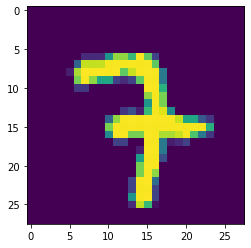

In [4]:
a = np.random.randint(60000)
plt.figure()
plt.imshow(x_train[a])
plt.show()

Converting the 2-D images of the digit into 1-D vector for better handling of vector multiplication. And asserting if the shape of the 1-D matches the desired shape. 

In [5]:
x_flatten = x_train.reshape(x_train.shape[0], -1)
assert x_flatten.shape == (60000, 784)

Converting the grey scale image into binary image

In [6]:
x_binary = []
for j in range(x_flatten.shape[0]):
#     x_binary[j].append([1 if i >=1 else 0 for i in x_flatten[0]])
    x_binary.append([1 if i >=1 else 0 for i in x_flatten[j]])

    
x_binary = np.array(x_binary)
x_binary.reshape(x_flatten.shape[0], -1)
assert x_binary.shape == (60000, 784)

Taking random image from the binarized image to ensure that data was converted successfully.

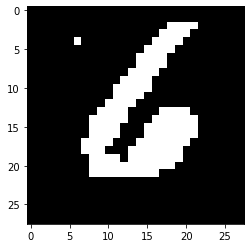

In [7]:
a = np.random.randint(60000)
plt.figure()
plt.imshow(x_binary[a].reshape(28, 28), cmap='gray')
plt.grid(False)

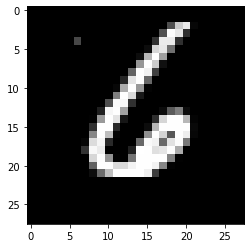

In [8]:
plt.figure()
plt.imshow(x_flatten[a].reshape(28, 28), cmap='gray')
plt.grid(False)

## Calculating Prior for predicting the sample
Counting the number samples for each of the classes/labels. And calculating the prior for predicting the smaple

In [9]:
# classes_count list the number of label of each class
classes, classes_count = np.unique(y_train, return_counts=True)
prior = classes_count / len(y_train)
number_of_classes = len(classes)

In [10]:
prior

array([0.09871667, 0.11236667, 0.0993    , 0.10218333, 0.09736667,
       0.09035   , 0.09863333, 0.10441667, 0.09751667, 0.09915   ])

Plotting the fequency of each of the class/label in the training dataset

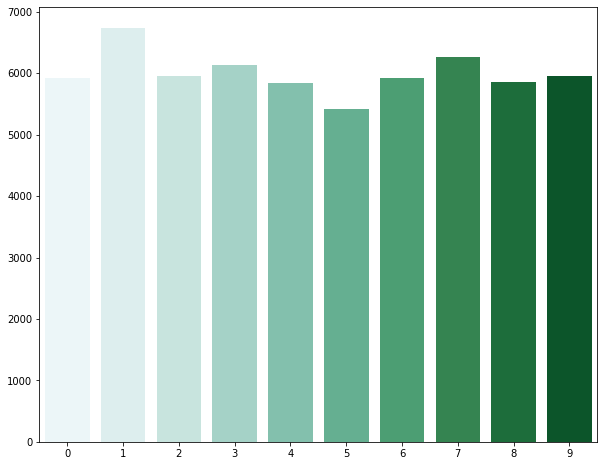

In [11]:
plt.figure(figsize=(10,8))
sns.barplot(classes, classes_count, palette='BuGn')
plt.show()

Counting the number of times the pixel of image of same class was True, i.e. number of times the given value of pixel is true given that it belongs to particular class. i.e. P(x_0=1 | C)

In [12]:
count_pixel = np.zeros((10, x_binary.shape[1]), dtype=np.float64)
for k, y_k in enumerate(np.unique(y_train)):
    ind = np.where(y_k == y_train)
    count_pixel[k] = np.sum(x_binary[ind], axis = 0)
    
# final_count is the total number of times the value of parrticular pixel is true through the whole dataset.
final_count = np.sum(count_pixel, axis=0)

## Defining function for calculating the Likelihood

In [13]:
def likelihood(x, cnt, class_cnt):
    like = []
    for i in range(len(x)):
        if x[i] == 1:
            like.append(cnt[i]/class_cnt)
        else:
            like.append((class_cnt-cnt[i])/class_cnt)
    return np.prod(like)


def likelihood_with_smoothing(x, cnt, class_cnt):
    like = []
    for i in range(len(x)):
        if x[i] == 1:
            like.append((cnt[i]+1)/(class_cnt+2))
        else:
            like.append((class_cnt-cnt[i] + 1)/(class_cnt+2))
    return np.prod(like)

## Defining the predicting function
P(C | x_0, x_1, x_2,......x_783) is equivalent to P(x_0, x_1, x_2,......x_783 | C )

In [14]:
def predict(x):
    return np.argmax([prior[k] * likelihood(x, count_pixel[k], classes_count[k]) for k in range(10)])

def predict_with_smoothing(x):
    return np.argmax([prior[k] * likelihood_with_smoothing(x, count_pixel[k], classes_count[k]) for k in range(10)])

Asserting that tha predictive model is working fine by testing it with randomly comparing the output of the model to the respective class of the testing data

In [15]:
for i in range(10):
    assert predict(x_binary[i]) == y_train[i]

## Testing the model with the test dataset
### Test function will take whole dataset as input and return the predicted output for each of the input.
### 1.a Without smoothing


In [16]:
def test(x, y):
    x_test_flatten = x.reshape(x.shape[0], -1)
    x_binary_test = []
    for j in range(x_test_flatten.shape[0]):
        x_binary_test.append([1 if i >=1 else 0 for i in x_test_flatten[j]])
    x_binary_test = np.array(x_binary_test)
    x_binary_test.reshape(x_test_flatten.shape[0], -1)
    print("done binarization")
    y_pred = []
    for i in range(10000):
        y_pred.append(predict(x_binary_test[i]))
    return y_pred

In [17]:
y_hat = test(x_test, y_test)

done binarization


## Accuracy and the misclassification error rate of model without smoothing

In [18]:
count = 0;
for i in range(10000):
    if y_hat[i]==y_test[i]:
        count+=1
print(f'Accuracy of the model without smooting is {count*100/y_test.shape[0]}%')

Accuracy of the model without smooting is 84.1%


In [19]:
print(classification_report(y_hat, y_test))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       981
           1       0.96      0.90      0.93      1204
           2       0.83      0.89      0.86       964
           3       0.83      0.76      0.80      1106
           4       0.81      0.83      0.82       955
           5       0.70      0.82      0.75       769
           6       0.89      0.89      0.89       952
           7       0.85      0.92      0.88       943
           8       0.78      0.76      0.77       995
           9       0.84      0.75      0.79      1131

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



### 1.b With smoothing 

In [20]:
def test_2(x, y):
    x_test_flatten = x.reshape(x.shape[0], -1)
    x_binary_test = []
    for j in range(x_test_flatten.shape[0]):
        x_binary_test.append([1 if i >=1 else 0 for i in x_test_flatten[j]])
    x_binary_test = np.array(x_binary_test)
    x_binary_test.reshape(x_test_flatten.shape[0], -1)
    print("done binarization")
    y_pred = []
    for i in range(10000):
        y_pred.append(predict_with_smoothing(x_binary_test[i]))
    return y_pred

y_hat_smoothing = test_2(x_test, y_test)

done binarization


## Accuracy and the misclassification error rate of model smoothing

In [21]:
count_smoothing = 0;
for i in range(10000):
    if y_hat_smoothing[i]==y_test[i]:
        count_smoothing+=1
print(f'Accuracy of the model without smooting is {count_smoothing*100/y_test.shape[0]}%')

Accuracy of the model without smooting is 84.13%


In [22]:
print(classification_report(y_hat_smoothing, y_test))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       980
           1       0.96      0.90      0.93      1204
           2       0.83      0.89      0.86       958
           3       0.84      0.76      0.80      1105
           4       0.81      0.83      0.82       963
           5       0.70      0.82      0.76       763
           6       0.89      0.89      0.89       958
           7       0.85      0.93      0.89       940
           8       0.78      0.75      0.77      1004
           9       0.84      0.75      0.79      1125

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

